# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Replacing the contents of last column(str) into numerical values

In [4]:
species_rename=[]
for i in data.species.values:
    if i=="setosa":
        species_rename.append(1)
    elif i=="versicolor":
            species_rename.append(2)
    elif i=="virginica":
                species_rename.append(3)
    else:
                species_rename.append(4)
data["species"]=species_rename
            

# Training the algorithm

In [5]:
X=data.iloc[:,0:2].values
X.shape

(150, 2)

In [6]:
y=data.iloc[:,-1].values
y.shape

(150,)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
X_train.shape

(120, 2)

In [9]:
X_test.shape

(30, 2)

# Calculating the value of k

In [10]:
np.sqrt(X_train.shape[0])

10.954451150103322

In [11]:
k=11

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [14]:
y_pred=knn.predict(X_test)
y_pred.shape

(30,)

In [15]:
y_test.shape

(30,)

# Checking the accuracy of algorithm

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8333333333333334

# Decision boundary making
  Creating a meshgrid

In [17]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)


XX,YY=np.meshgrid(a,b)
YY.shape

(440, 560)

# Classifying every point on the meshgrid

In [18]:
input_array=np.array([XX.ravel(),YY.ravel()]).T
labels=knn.predict(input_array)

# Plotting the array as an image

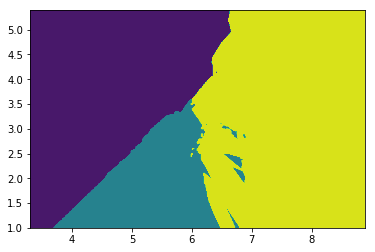

In [19]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

# Plotting all data on the plot

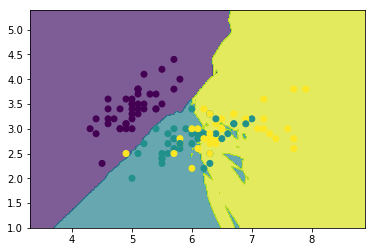

In [20]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.7)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)